# Analysis of Crime in the US Localities
# Problem and Clients
**Public Safety is always an important sector and measurement of the local communities. For many, crime is a serious cause for concern and often impacts people's decision to live in certain areas. It's a frequent issue for communities, and many other issues can be affected by criminal activity in the area.**

**Crime can also act as an obstacle to the improvements made by community development. Most development plans need to consider the impact that crime-current and potential-can have on improvement efforts, and solutions to address those factors are often going to be a necessary inclusion. Ignoring community aspects related to crime isn't just going to be problematic later on, it's a sloppy way of planning that can make things unnecessarily difficult.**

**Thus, it is vital to analyze and predict the crime rate based on demographics and economic information about the particular locality. Also to find out which are the key factors that affect the crime rate.**

**My client will be Bureau and police departments around the country. Using machine learning to help them better focus their resources on locations where crimes are more likely to be committed. Also, my client can be US online and print media that cover socio-economic and urban issues. These clients are magazines that take an active interest in stories driven by socially relevant issues and are backed by data analytics, for creating awareness within the public while simultaneously enhancing the quality of their readership.**

# About the Data
**The data was culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan. This data was put together by Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle University; Philadelphia, PA, 19141, USA on July 2009. The data come with the full dataset: crime in the US.csv and its explanation txt file: crime.names.txt. Please see my project directory for all the files**


# Load the Data

In [1]:
import pandas as pd 
import numpy as np
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plot
from sklearn import linear_model
from IPython.display import Image 
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import math
import sklearn.linear_model as linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
import seaborn as sns
import statsmodels.api as sm
import pylab as pl
from sklearn.metrics import roc_curve, auc
from subprocess import check_output
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('communities-crime-full.csv')

In [5]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [6]:
df.shape

(1994, 128)

**we can see that this dataset has 128 columns and 1994 rows. All data has been normalized between 0 and 1 already. The target variable is ViolentCrimesPerPop: total number of violent crimes per 100K population**

# Data Wrangling and Exploration Analysis
## Missing Values
**From the data preview, we can see there are several columns with lots of question marks. I will convert the question marks to NaNs and check the number of NaNs for each column first. Drop the two columns:county and community as they have numbers which do not have any meaning and we already have the communityname column. There are some columns with more than 1600 missing values while we have total 1994 rows. I would also drop those columns. There are 105 columns after removing those columns with missing values.**

**Then I will check again to see if there is any missing values. And I found the column: OtherPerCap, which is per capita income for people with 'other' heritage. I would fill the NaNs in this column using the mean of the this column group by state where the missing value is.** 

In [3]:
df=df.replace('?', np.NaN)

In [5]:
print(df.isnull().sum())

state                      0
county                  1174
community               1177
communityname              0
fold                       0
population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
                        ... 
PctSameHouse85             0
PctSameCity85              0
PctSameState85             0
LemasSwornFT  

In [4]:
df=df.dropna(thresh=len(df)-1000,axis=1, how='any')
df.shape

(1994, 104)

In [5]:
df.isnull().values.any()

True

In [6]:
df.columns[df.isnull().any()].tolist()

['OtherPerCap']

In [7]:
print(type(df.OtherPerCap))

<class 'pandas.core.series.Series'>


In [8]:
df['OtherPerCap']=pd.to_numeric(df.OtherPerCap)

In [9]:
# Create a groupby object
group = df.groupby('state')
# Write a function that imputes mean
def impute_mean(series):
    return series.fillna(series.mean())

df.OtherPerCap = group.OtherPerCap.transform(impute_mean)


In [10]:
df.isnull().values.any()

False

In [11]:
df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [12]:
df.sort_values(['state', 'communityname']).reset_index(drop=True).head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15


## Histogram
**Plot a histogram to see the distribution of the violent crime rate per 100k population, we can see that most rates are between 0 to 0.2. The mean is 0.24 and standard deviation of 0.23. Medium is 0.15 and the Mode is 0.03. Only a few instances are above 0.5 and there are two records have crime rates of 1. But I will not identify them as outliers as I need them to classify high crime area later. It make sense that extrme high crime rates exists in a small number of areas. I will then group the crime rate by state and get the average crime rate for each state and view the top 10 states in descending order to see which states have higher crime rate per capita.**

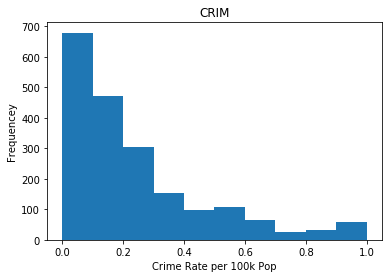

In [16]:
plt.hist(df.ViolentCrimesPerPop)
plt.title("CRIM")
plt.xlabel("Crime Rate per 100k Pop")
plt.ylabel("Frequencey")
plt.show()

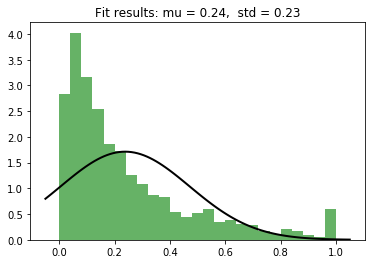

In [96]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fit a normal distribution to the data:
mu, std = norm.fit(df.ViolentCrimesPerPop)

# Plot the histogram.
plt.hist(df.ViolentCrimesPerPop, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [34]:
print(df.ViolentCrimesPerPop.median())

0.15


In [53]:
print(df.ViolentCrimesPerPop.mode())

0    0.03
dtype: float64


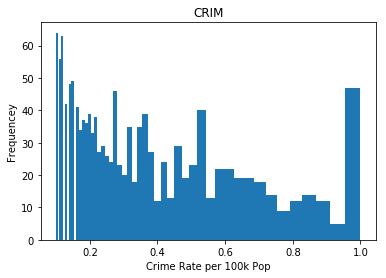

In [103]:
plt.hist(df.ViolentCrimesPerPop, bins=np.logspace(np.log10(0.1),np.log10(1.0), 50))
plt.title("CRIM")
plt.xlabel("Crime Rate per 100k Pop")
plt.ylabel("Frequencey")
plt.show()

In [17]:
#Get the average crime rate by state and view top10 in descending order
by_state = df.groupby('state')
avg_crime = by_state['ViolentCrimesPerPop'].mean()
print(avg_crime.sort_values(ascending=False).head(10))

state
11    1.000000
22    0.504545
45    0.486786
24    0.480000
12    0.458333
37    0.401957
1     0.393721
13    0.384054
10    0.370000
20    0.360000
Name: ViolentCrimesPerPop, dtype: float64


In [14]:
print(avg_crime.median())

0.21466060606060605


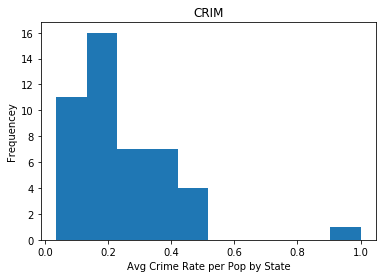

In [15]:
plt.hist(avg_crime)
plt.title("CRIM")
plt.xlabel("Avg Crime Rate per Pop by State")
plt.ylabel("Frequencey")
plt.show()

In [39]:
pd.merge(avg_crime, df, on=['state'], how='left').sort_values('ViolentCrimesPerPop_x',ascending=False).head()

,state,ViolentCrimesPerPop_x,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop_y
464,11,1.000000,Washingtoncity,6,0.96,0.32,1.00,0.00,0.11,0.10,...,0.29,0.36,0.57,0.61,0.33,0.18,0.83,1.00,0.45,1.00
715,22,0.504545,BossierCitycity,10,0.07,0.50,0.35,0.69,0.09,0.05,...,0.07,0.49,0.43,0.42,0.44,0.11,0.12,0.02,0.52,0.44
713,22,0.504545,Natchitochescity,9,0.01,0.68,0.97,0.21,0.04,0.02,...,0.02,0.87,0.49,0.60,0.80,0.03,0.14,0.00,0.00,0.33
712,22,0.504545,Kennercity,8,0.10,0.55,0.35,0.66,0.10,0.18,...,0.23,0.74,0.58,0.71,0.76,0.04,0.40,0.12,0.53,0.50
711,22,0.504545,Shreveportcity,8,0.30,0.42,0.87,0.30,0.03,0.02,...,0.03,0.77,0.62,0.81,0.78,0.29,0.17,0.19,1.00,0.53


**Plot a histogram for the average crime rate by state, we can see most rates are between 0.1 to 0.2. Only two states are above 0.5. By merging with tht original dataset, we can see the top 2 states are washington dc and Louisiana by reading the coresponding communityname column.**

## Correlations and Scatterplots
**Since this dataset has 104 columns, the pair correlations cannot be visualized. So I am going to only output the top 10 fields that have the highest correlations to the target variables: ViolentCrimesPerPop.**

In [70]:
S=df.drop(['ViolentCrimesPerPop','communityname'], axis=1).apply(lambda x: x.corr(df.ViolentCrimesPerPop))

In [75]:
S[S.abs().sort_values(ascending=False).head(10).index]

PctKids2Par        -0.738424
PctIlleg            0.737957
PctFam2Par         -0.706667
racePctWhite       -0.684770
PctYoungKids2Par   -0.666059
PctTeen2Par        -0.661582
racepctblack        0.631264
pctWInvInc         -0.576324
pctWPubAsst         0.574665
FemalePctDiv        0.556032
dtype: float64

**From the top 10 variables that have the highest correlations with the target variables are mainly involving single parents or two parents, race, kids, age, income, public assistance, and gender. Then I would plot some scatterplots to visulaize those relationships.**

**Variable Explanation:**

PctKids2Par:       percentage of kids in family housing with two parents

PctIlleg:          percentage of kids born to never married

PctFam2Par:          percentage of families (with kids) that are headed by two parents

racePctWhite:        percentage of population that is caucasian 

PctYoungKids2Par:   percent of kids 4 and under in two parent households 

PctTeen2Par:        percent of kids age 12-17 in two parent households

racepctblack:        percentage of population that is african american

pctWInvInc:          percentage of households with investment / rent income

pctWPubAsst:         percentage of households with public assistance income

FemalePctDiv:        percentage of females who are divorced

**I will then plot the first two variables to visualize their highyl correlated relationship with the target variable:**

Text(0.5, 1.0, 'Relationship between PctKids2Par and Crime')

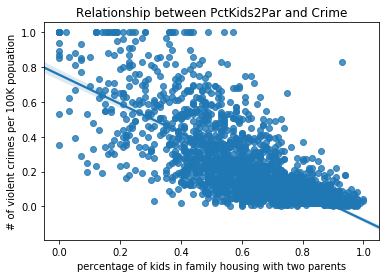

In [78]:
sns.regplot(y="ViolentCrimesPerPop", x="PctKids2Par", data=df, fit_reg = True)
plt.xlabel("percentage of kids in family housing with two parents")
plt.ylabel("# of violent crimes per 100K popuation")
plt.title("Relationship between PctKids2Par and Crime")

**this plot shows that the higher the percentage of kids in family with two parents, the lower the crime rate**

Text(0.5, 1.0, 'Relationship between PctIlleg and Crime')

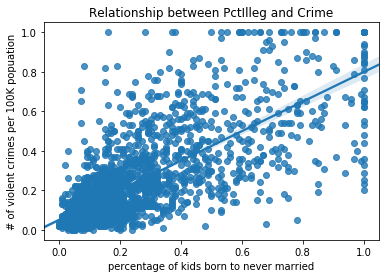

In [81]:
sns.regplot(y="ViolentCrimesPerPop", x="PctIlleg", data=df, fit_reg = True)
plt.xlabel("percentage of kids born to never married")
plt.ylabel("# of violent crimes per 100K popuation")
plt.title("Relationship between PctIlleg and Crime")

**this plot shows that the higher the percentage of kids born to never married (single mother), the higher the crime rate**

# Regression Model and Selection
**I would like to develop some regression models and select the best one to predict the violent crime rate per 100k population. Since the data has 100+ features, I will use Lasso, Ridge regression and elastic net regression. Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties. They are all good regressors that can handle high dimensional dataset**

## LASSO

In [35]:
## Lasso
X = df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).values
y = df['ViolentCrimesPerPop'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [42]:
lasso = Lasso()
alphas=(10,1, 0.1, 0.01, 0.001)

tuned_parameters = [{'alpha': alphas}]

clf = GridSearchCV(lasso, tuned_parameters, cv=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Lasso Tuned alpha: {}".format(clf.best_params_)) 
print("Lasso R-Squared: {}".format(clf.score(X_test, y_test)))
print("Lasso training MSE: {}".format(mean_squared_error(y_train,clf.predict(X_train)))) 
print("Lasso test MSE: {}".format(mean_squared_error(y_test,y_pred))) 

Lasso Tuned alpha: {'alpha': 0.001}
Lasso R-Squared: 0.645254861011625
Lasso training MSE: 0.019063494299923905
Lasso test MSE: 0.016985112938762453


### Feature Importance Selection by Lasso

In [47]:
# Compute and print the coefficients
df_columns=df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).columns
lasso=Lasso(alpha=0.001)
lasso_coef = lasso.fit(X_train,y_train).coef_
coef = pd.Series(lasso_coef, index = df_columns)
print(coef[coef.abs().sort_values(ascending=False).head(10).index])

PctIlleg            0.199039
PctKids2Par        -0.161789
MalePctDivorce      0.152250
racepctblack        0.148846
NumStreet           0.144383
PctYoungKids2Par   -0.077533
HousVacant          0.076542
PctPersDenseHous    0.069958
PctHousOccup       -0.062515
racePctWhite       -0.059853
dtype: float64


In [48]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 21 variables and eliminated the other 79 variables


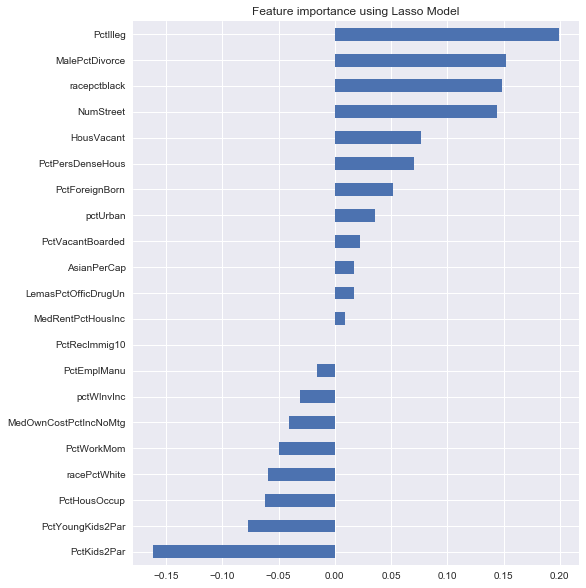

In [51]:
imp_coef = coef[coef!=0].sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

## Ridge Regression

In [39]:
## Ridge Regression
ridge = Ridge()
alphas=(10,1, 0.1, 0.01, 0.001,100)

tuned_parameters = [{'alpha': alphas}]

clf = GridSearchCV(ridge, tuned_parameters, cv=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("ridge Tuned alpha: {}".format(clf.best_params_)) 
print("ridge R-Squared: {}".format(clf.score(X_test, y_test)))
print("ridge training MSE: {}".format(mean_squared_error(y_train,clf.predict(X_train)))) 
print("ridge test MSE: {}".format(mean_squared_error(y_test,y_pred))) 

ridge Tuned alpha: {'alpha': 1.0}
ridge R-Squared: 0.633979696797609
ridge training MSE: 0.0171756282734736
ridge test MSE: 0.017524965121442904


## Elastic net

In [45]:
## Elastic net
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()

gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/apple/ana

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.41990183317661167
Tuned ElasticNet MSE: 0.027774962349483238


/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Final Regression Model Selection
**After comparing three regression models, it turns out that Lasso regression is the best as it has the highest R-Square and lowest MSE. The Lasso regression model explains 64.5% of the variance in the model. Not overfitting as the MSE for both training and testing are similar**

**Since Lasso is the best model. I used it to see the feature importance ranking based on this model and what features it retained to build the model. From the above graph we can see Lasso picked 21 variables and eliminated the other 79 variables.**

**its top ten most important variables are below, Which are very similar variables as we see before by using the correlation:**

**PctIlleg  
PctKids2Par  
MalePctDivorce 
racepctblack 
NumStreet: number of homeless people counted in the street      
PctYoungKids2Par   
HousVacant: number of vacant households        
PctPersDenseHous: percent of persons in dense housing (more than 1 person per room) 
          PctHousOccup:percent of housing occupied       
racePctWhite**       

**Besides the race, single parent, divorce and income aspects, it gives us more areas like house occupancy situation and homeless in the street**

# Classification Model and Selection
## Find the optimal cut-off point
**I would like to find a optimal cutoff point of the crime rate and use this point to classify the rate into a binary variable: high crime and low crime. The optimal cut off point would be where true positive rate is high and the false positive rate is low.** 

In [16]:
X = df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).values
y = df['ViolentCrimesPerPop'].values
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


In [20]:
pca = PCA()
pcafit = pca.fit_transform(X,y)
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
print(pd.Series(var_explained))

0     0.267681
1     0.187885
2     0.082399
3     0.070963
4     0.046097
5     0.039662
6     0.032511
7     0.027600
8     0.020510
9     0.019057
10    0.014152
11    0.013733
12    0.012996
13    0.011851
14    0.010492
15    0.008844
16    0.008238
17    0.007403
18    0.006914
19    0.006492
20    0.006231
21    0.006006
22    0.005889
23    0.005526
24    0.004943
25    0.004354
26    0.004080
27    0.003934
28    0.003682
29    0.003563
        ...   
70    0.000330
71    0.000312
72    0.000294
73    0.000269
74    0.000261
75    0.000225
76    0.000209
77    0.000198
78    0.000191
79    0.000178
80    0.000168
81    0.000158
82    0.000149
83    0.000124
84    0.000111
85    0.000095
86    0.000084
87    0.000065
88    0.000063
89    0.000054
90    0.000042
91    0.000038
92    0.000037
93    0.000035
94    0.000019
95    0.000017
96    0.000015
97    0.000007
98    0.000007
99    0.000005
Length: 100, dtype: float64


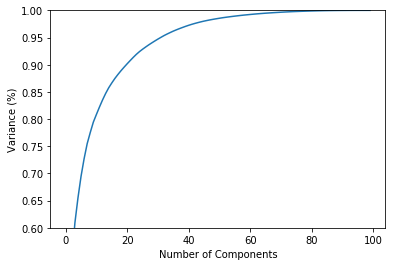

In [32]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.ylim([0.6, 1])
plt.plot(np.cumsum(var_explained))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [41]:
print(sum(var_explained[0:60]))

0.9918648409443792


### Find the number of components should keep using PCA
**This plot tells us that selecting 60 components we can preserve something around 99% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.
With this information in our hands, we can implement the PCA for 60 best components**

In [17]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y, test_size=0.3,random_state=5)

In [31]:
# Create the hyperparameter grid
param_range_fl = [1.0, 0.5, 0.1]
param_grid = [{'clf__penalty': ['l1', 'l2'],
'clf__C': param_range_fl}]  

lab_enc = preprocessing.LabelBinarizer()
training_scores_encoded = lab_enc.fit_transform(ylr.astype(int))

# create pipeline from pca to logregression space
pipe_lr_pca = Pipeline([('pca', PCA(n_components=60)),
('clf', LogisticRegression(class_weight='balanced',solver='liblinear'))])


In [32]:
# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(pipe_lr_pca, param_grid, cv=5)
# Fit the model on the trainng data.
logreg_cv.fit(Xlr, training_scores_encoded)
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))

C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A colu

Tuned Logistic Regression Parameter: {'clf__C': 1.0, 'clf__penalty': 'l1'}


In [106]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg_cv.predict_proba(Xtestlr)[:,1]
lab_enc = preprocessing.LabelBinarizer()
testing_scores_encoded = lab_enc.fit_transform(ytestlr.astype(int))

In [112]:
print(testing_scores_encoded)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [107]:
threshold = Find_Optimal_Cutoff(testing_scores_encoded, y_pred_prob)
print (threshold)

[0.13097645422774193]


C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [14]:
def setHighCrime(df):
    '''Function to set value of highCrime depending on ViolentCrimesPerPop'''
    if df['ViolentCrimesPerPop'] > 0.13097645422774193:
        return True
    else:
        return False
    
# Adding a new field "highCrime"
df['highCrime'] = df.apply(setHighCrime, axis=1)

# Calculating the percentage of positive and negative instances in the dataset
percentage_intances = df.groupby('highCrime').size() * 100 / len(df)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))

highCrime
False    45.336008
True     54.663992
dtype: float64
------------------
Percentage Positive Instance = 54.663991975927786
Percentage Negative Instance = 45.336008024072214 


## Create a new binary target variable
**Now, I have created a new target variable using the optimal cut-off point from the logistic regression and ROC curve. The new target variable is highcrime. If the ViolentCrimesPerPop is greater than 0.13097645422774193, then will be true. Otherwise will be false. We can see the two classes are pretty balanced with 55 to 45. I will use this binary target variable to fit all classification models next. Let's preview the dataset before building the models:**

In [17]:
df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20,True
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67,True
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43,True
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12,False
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03,False


## Fit PCA and Find # of Components again 
**Now we can see the new highCrime target variable in the dataset. I will create new X and y and fit a PCA again using this new target variable: highCrime to find out the number of components should keep for the classifications models.**

In [15]:
X = df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).drop('highCrime', axis=1).values
y = df['highCrime'].values

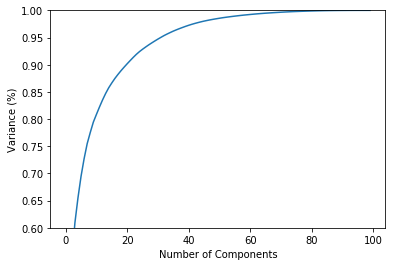

In [16]:
pca = PCA()
pcafit = pca.fit_transform(X,y)
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.ylim([0.6, 1])
plt.plot(np.cumsum(var_explained))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [17]:
print(sum(var_explained[0:35]))

0.9591785544029707


**This plot tells us that selecting 35 components we can preserve something around 96% of the total variance of the data. Sicne the LASSO only uses 21 variables in the end, we can tell that most of variables are noises and we do not have to capture 100% of the variances. we can implement the PCA for 35 best components next**

## Logistic Regression

In [18]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=5)

In [19]:
# Create the hyperparameter grid
param_range_fl = [1.0, 0.5, 0.1]
param_grid = [{'clf__penalty': ['l1', 'l2'],
'clf__C': param_range_fl}]  

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=5)

# create pipeline from pca to logregression space
pipe_lg_pca = Pipeline([('pca', PCA(n_components=35)),
('clf', LogisticRegression(class_weight='balanced',solver='liblinear'))])

# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(pipe_lg_pca, param_grid, cv=5)

logreg_cv.fit(X_train, y_train)
y_pred_log = logreg_cv.predict(X_test)

In [20]:
# Compute and print metrics
print("LogisticRegression Accuracy: {}".format(logreg_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred_log))
print("LogisticRegression Tuned Model Parameters: {}".format(logreg_cv.best_params_))

y_pred_log_prob = logreg_cv.predict_proba(X_test)[:,1]
print("LogisticRegression AUC Score: {}".format(roc_auc_score(y_test, y_pred_log_prob)))

LogisticRegression Accuracy: 0.8464106844741235
              precision    recall  f1-score   support

       False       0.81      0.87      0.84       275
        True       0.88      0.83      0.85       324

   micro avg       0.85      0.85      0.85       599
   macro avg       0.85      0.85      0.85       599
weighted avg       0.85      0.85      0.85       599

LogisticRegression Tuned Model Parameters: {'clf__C': 0.5, 'clf__penalty': 'l2'}
LogisticRegression AUC Score: 0.9250280583613917


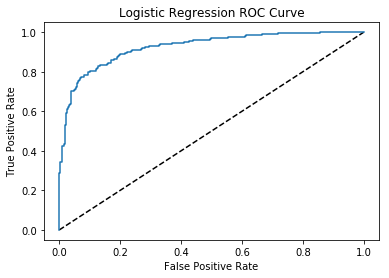

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

## KNN

In [22]:
# create pipeline from pca to KNN
pipe_knn_pca = Pipeline([('pca', PCA(n_components=35)),
('clf', KNeighborsClassifier())])
#create a dictionary of all values we want to test for n_neighbors
param_grid = [{'clf__n_neighbors': np.arange(1, 25)}]
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(pipe_knn_pca, param_grid, cv=5)

In [23]:
#fit model to data
knn_gscv.fit(X_train, y_train)
y_pred_knn = knn_gscv.predict(X_test)

In [24]:
# Compute and print metrics
print("KNN Accuracy: {}".format(knn_gscv.score(X_test, y_test)))
print(classification_report(y_test, y_pred_knn))
print("KNN Tuned Model Parameters: {}".format(knn_gscv.best_params_))

y_pred_knn_prob = knn_gscv.predict_proba(X_test)[:,1]
print("KNN AUC Score: {}".format(roc_auc_score(y_test, y_pred_knn_prob)))

KNN Accuracy: 0.8163606010016694
              precision    recall  f1-score   support

       False       0.80      0.81      0.80       275
        True       0.83      0.82      0.83       324

   micro avg       0.82      0.82      0.82       599
   macro avg       0.82      0.82      0.82       599
weighted avg       0.82      0.82      0.82       599

KNN Tuned Model Parameters: {'clf__n_neighbors': 21}
KNN AUC Score: 0.9111896745230078


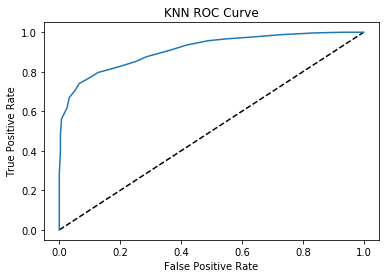

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

## Random Forests

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'clf__n_estimators': n_estimators,
               'clf__max_features': max_features,
               'clf__max_depth': max_depth,
               'clf__min_samples_split': min_samples_split,
               'clf__min_samples_leaf': min_samples_leaf,
               'clf__bootstrap': bootstrap}

**On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.**

In [27]:
# Use the random grid to search for best hyperparameters
# First create the pipeline
pipe_rf_pca =Pipeline([('pca', PCA(n_components=35)),
('clf', RandomForestClassifier(random_state=42))])
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = pipe_rf_pca, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
           ...rs='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'clf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'clf__max_features': ['auto', 'sqrt'], 'clf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'clf__min_samples_split': [2, 5, 10], 'clf__min_samples_leaf': [1, 2, 4], 'clf__bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn

**The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time.**

**We can view the best parameters from fitting the random search, from these results, we should be able to narrow the range of values for each hyperparameter:**

In [28]:
rf_random.best_params_

{'clf__n_estimators': 1000,
 'clf__min_samples_split': 5,
 'clf__min_samples_leaf': 2,
 'clf__max_features': 'sqrt',
 'clf__max_depth': 20,
 'clf__bootstrap': True}

**Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:**

In [29]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'clf__bootstrap': [True],
    'clf__max_depth': [20, 30, 40],
    'clf__max_features': [2, 3],
    'clf__min_samples_leaf': [2,3],
    'clf__min_samples_split': [2,3,4],
    'clf__n_estimators': [800,1000,1200]
}
# set a pipeline
pipe_rf_pca =Pipeline([('pca', PCA(n_components=35)),
('clf', RandomForestClassifier(random_state=42))])
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe_rf_pca, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the random search model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  5.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
           ...rs='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__bootstrap': [True], 'clf__max_depth': [20, 30, 40], 'clf__max_features': [2, 3], 'clf__min_samples_leaf': [2, 3], 'clf__min_samples_split': [2, 3, 4], 'clf__n_estimators': [800, 1000, 1200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [30]:
y_pred_rf = grid_search.predict(X_test)
# Compute and print metrics
print("RandomForest Accuracy: {}".format(grid_search.score(X_test, y_test)))
print(classification_report(y_test, y_pred_rf))
print("RandomForest Tuned Model Parameters: {}".format(grid_search.best_params_))

y_pred_rf_prob = grid_search.predict_proba(X_test)[:,1]
print("RandomForest AUC Score: {}".format(roc_auc_score(y_test, y_pred_rf_prob)))

RandomForest Accuracy: 0.8263772954924875
              precision    recall  f1-score   support

       False       0.85      0.76      0.80       275
        True       0.81      0.88      0.85       324

   micro avg       0.83      0.83      0.83       599
   macro avg       0.83      0.82      0.82       599
weighted avg       0.83      0.83      0.83       599

RandomForest Tuned Model Parameters: {'clf__bootstrap': True, 'clf__max_depth': 30, 'clf__max_features': 3, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 3, 'clf__n_estimators': 800}
RandomForest AUC Score: 0.915925925925926


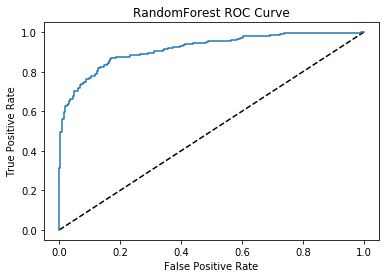

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC Curve')
plt.show()

### Feature Importance Selection by Random Forest
**Create a dataframe: X1 from the df to use its column names for the feature importance index later**

In [32]:
X1=df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).drop('highCrime', axis=1)

In [49]:
feature_importances = pd.DataFrame(grid_search.best_estimator_.named_steps["clf"].feature_importances_,
                                  index = X1.columns,
                                    columns=['importance']).sort_values('importance',ascending=False).head(10)
print(feature_importances)

                  importance
PctKids2Par         0.046222
racePctWhite        0.035730
PctFam2Par          0.032959
PctIlleg            0.031633
PctPersDenseHous    0.027066
FemalePctDiv        0.025187
PctYoungKids2Par    0.024159
TotalPctDiv         0.023961
PctPopUnderPov      0.022527
racepctblack        0.022409


No handles with labels found to put in legend.


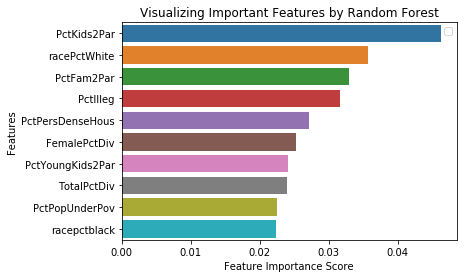

In [50]:
# Creating a bar plot
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features by Random Forest")
plt.legend()
plt.show()

## SVM

In [34]:
# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

pipe_svm_pca = Pipeline([('pca', PCA(n_components=35)),
('SVM', svm.SVC(probability=True,random_state=42))])

svm_cv = GridSearchCV(pipe_svm_pca, parameters, cv=5)

svm_cv.fit(X_train, y_train)
y_pred_svm = svm_cv.predict(X_test)

In [35]:
# Compute and print metrics
print("SVM Accuracy: {}".format(svm_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred_svm))
print("SVM Tuned Model Parameters: {}".format(svm_cv.best_params_))

y_pred_svm_prob = svm_cv.predict_proba(X_test)[:,1]
print("SVM AUC Score: {}".format(roc_auc_score(y_test, y_pred_svm_prob)))

SVM Accuracy: 0.8480801335559266
              precision    recall  f1-score   support

       False       0.82      0.85      0.84       275
        True       0.87      0.85      0.86       324

   micro avg       0.85      0.85      0.85       599
   macro avg       0.85      0.85      0.85       599
weighted avg       0.85      0.85      0.85       599

SVM Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}
SVM AUC Score: 0.9319640852974187


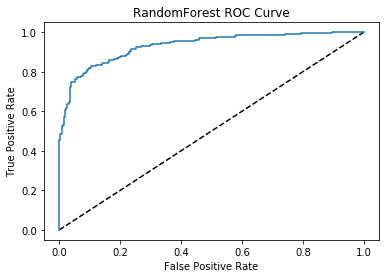

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC Curve')
plt.show()

## Final Classification Model Selection
**By Comparing the four models. SVM is the best as it has the highest AUC score of 93% and Accuracy of 85% and also good confusion metrics score comparing to the other 3. But I also used random forest to see the top 10 important features by this model:**

**PctKids2Par         
racePctWhite        
PctFam2Par          
PctIlleg            
PctPersDenseHous    
FemalePctDiv        
PctYoungKids2Par    
TotalPctDiv: percentage of population who are divorced         
PctPopUnderPov: percentage of people under the poverty level      
racepctblack** 

**Also, these features are almost the same ones as before. They shows single parent, race, divorce rate and poverty are important areas affecting the crime rate.**

# Conclusion and Recommendation

**There are two models finally selected: Lasso can be used to predict crime rate per 100k population and the SVM can be used to predict whether the place is a high crime area or not. Based on the important features that we have from the correlation and models, I have the following recommendations for my clients:**

**1 – From all those important features, we can know that family composition is the root cause of crime. According to various studies, the absence of the father is the single most important cause of poverty. The same is true for crime. Of all adolescents, those in intact married families are the least likely to commit crimes. Children of single-parent (including divorces) homes are more likely to be abused, have emotional problems, engage in questionable behavior, struggle academically, and become delinquent. Problems with children from fatherless families can continue into adulthood. These children are three times more likely to end up in jail by the time they reach age 30 than are children raised in intact families, and have the highest rates of incarceration in the United States. So accurate guidance and education opportunities are vital for these children. The cities should offer various benefits and services to single parent family such as arranging social workers to offer free or affordable help to these families. it can not only help to look after the children when the parents go to work but also fill the love and characteristics of the other half that the child is missing. Also, the social worker must make sure that the children have had equal education opportunities as other children and follow up with any important feedback from these special families to improve and develop new services.**

**2 – My second recommendation is that the findings also show that having high house vacancy in each neighbourhood is an important indicator for higher major crime rate. Usually, a neighbourhood with high house vacancy is a sympton that may imply this place is not very delevoped as people tend not to come to the place that lacks of resources. Which give us implication that how to develop such neighbourhoods so to attract more people coming to the them is the key. First, I recommend to evaluate and equip these neighbourhoods with necessary resources such as infrastructures, hospitals, education and etc. I also recommend by developing attractive benefits and strategies for doing business in those neighborhoods. Having more people and businesses is a sign of urbanization and impacts the overall economic health of a neighborhoods. We need to facilitate the growth of businesses. In addition, having strategies to provide the people with the necessary training and self-financing opportunities for starting their own entrepreneurial ventures. The city should provide various economic incentives for entrepreneurs and ensure that people in every neighbourhood are made aware of these opportunities.**

**3 – The findings show a correlation between the number of people receiving public assistance and the amount of major crime in a neighbourhood. This probably reflects the immediate housing and income needs of people in that neighbourhood. The city should consider ways in which social assistance programs can assist people not just in the short-term by providing income and housing help, but also in the long-term by offering accessible education and employability programs to these people. The city can also do an assessment of these long-term programs for their effectiveness in reducing crime over a 2-5 year period.**


# Rereferences
1) U.S. Census Bureau, Current Population Survey, “Living Arrangements of Children under 18 Years/1 and Marital Status of Parents by Age, Sex, Race, and Hispanic Origin/2 and Selected Characteristics of the Child for all Children 2010.” Table C3. Internet Release Date November, 2010.
2) M. Anne Hill and June O’Neill, Underclass Behaviors in the United States: Measurement and Analysis of Determinants (New York: City University of New York, Baruch College, 1990). 
Robert Rector, “Married Fathers: America’s Greatest Weapon Against Child Poverty,” June 16, 2010. Available at http://www.heritage.org/research/reports/2010/06/married-fathers-americas-greatest-weapon-against-child-poverty. Accessed June 19, 2015.
3) Wendy D. Manning and Kathleen A. Lamb, “Adolescent Well-Being in Cohabiting, Married, and Single-Parent Families,” Journal of Marriage and Family 65, no. 4 (2003): 876-893.
4) Robert Rector, “Marriage: America’s Greatest Weapon Against Child Poverty,” Heritage Foundation Special Report no. 117, September 5, 2012, http://www.heritage.org/research/reports/2010/09/marriage-america-s-greatest-weapon-against-child-poverty.
5) Cynthia C. Harper and Sara S. McLanahan, “Father Absence and Youth Incarceration,” Journal of Research on Adolescence 14, no. 3 (2004): 369–397.